In [1]:
import xarray as xr
import numpy as np
import matplotlib as mpl
import xesmf
import pylab as PP
import cartopy
import datetime as dt
from get_regcm_projection import get_regcm_projection
import gfs_icbc

In [2]:
""" Get the regcm projection. """
rcm_proj = get_regcm_projection("fog_ctd_control_ICBC.2021060100.nc")

In [3]:
gfs_path_template = "https://www.ncei.noaa.gov/thredds/dodsC/model-gfs-g4-anl-files/{year:04}{month:02}/{year:04}{month:02}{day:02}/gfs_4_{year:04}{month:02}{day:02}_{hour:04}_000.grb2"
date = dt.datetime(2021,6,27,18)
gfs_file = gfs_path_template.format(year = date.year, month = date.month, day = date.day, hour = date.hour*100)
icbc_xr = xr.open_dataset("fog_ctd_control_ICBC.2021060100.nc").sel(time = date)
gfs_p_xr, gfs_s_xr = gfs_icbc.open_gfs_file(gfs_file)

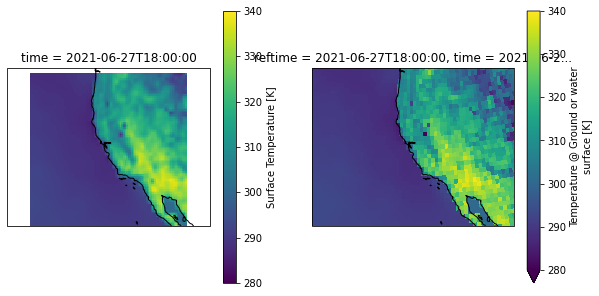

In [4]:
fig, axs = PP.subplots(1,2,
                       sharex = True,
                       sharey = True,
                       figsize = (10,5), subplot_kw = dict(projection = rcm_proj))

vmin = 280
vmax = 340
ax = axs[0]
icbc_xr['ts'].plot(ax = ax, transform = rcm_proj, vmin = vmin, vmax = vmax)
ax.coastlines()

ax = axs[1]
gfs_s_xr['t'].plot(ax = ax, transform = cartopy.crs.PlateCarree(), vmin = vmin, vmax = vmax)
ax.coastlines()

ax.set_extent([icbc_xr.dlon.min(),icbc_xr.dlon.max(),icbc_xr.dlat.min(),icbc_xr.dlat.max()], crs = cartopy.crs.PlateCarree())

PP.show()